In [1]:
# %%bash
# brew install mecab mecab-ipadic git curl xz
# pip install mecab-python3

Updating Homebrew...
==> Auto-updated Homebrew!
Updated 1 tap (homebrew/core).
==> New Formulae
bcoin                      git-remote-codecommit      oil
beancount                  gmailctl                   pass-git-helper
ccheck                     go-jsonnet                 semtag
cdk8s                      gobo                       tengo
confd                      hsd                        trimage
dolt                       inxi                       vroom
emacs-dracula              llvm@9                     wolfmqtt
flash                      minipro
geph2                      nef
==> Updated Formulae
grpcurl ✔                                libjson-rpc-cpp
imagemagick@6 ✔                          libmaa
node ✔                                   libmwaw
openssl@1.1 ✔                            libomp
pkg-config ✔                             libopenmpt
pyenv ✔                                  libpeas
ruby-build ✔                             libphonenumber
terraform ✔             


==> Downloading https://homebrew.bintray.com/bottles/mecab-0.996.catalina.bottle
==> Downloading from https://akamai.bintray.com/db/dba6306bcd5ddb9a824cb366b5432
######################################################################## 100.0%
==> Pouring mecab-0.996.catalina.bottle.3.tar.gz
🍺  /usr/local/Cellar/mecab/0.996: 20 files, 4.2MB
==> `brew cleanup` has not been run in 30 days, running now...
Removing: /Users/shota.kikuchi/Library/Caches/Homebrew/grpcurl--1.5.0.catalina.bottle.tar.gz... (9.1MB)
Removing: /Users/shota.kikuchi/Library/Caches/Homebrew/imagemagick@6--6.9.11-0.catalina.bottle.tar.gz... (8.7MB)
Removing: /Users/shota.kikuchi/Library/Logs/Homebrew/libtiff... (64B)
Removing: /Users/shota.kikuchi/Library/Logs/Homebrew/libtool... (64B)
Removing: /Users/shota.kikuchi/Library/Logs/Homebrew/imagemagick@6... (64B)
Removing: /Users/shota.kikuchi/Library/Logs/Homebrew/grpcurl... (64B)
Removing: /Users/shota.kikuchi/Library/Logs/Homebrew/little-cms2... (64B)
Removing: /Users/s

In [3]:
import MeCab

In [8]:
mecab = MeCab.Tagger()
with open('data/neko.txt') as rf, open('neko.txt.mecab', 'w') as wf:
    wf.write(mecab.parse(rf.read()))

In [9]:
%%bash
head neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ


## 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [28]:
file_name = 'neko.txt.mecab'
ret = []
tmp_ret = []
with open(file_name) as rf:
    i = 10
    for w in rf:
        if w == 'EOS\n':
            continue
        surface, rest = w.split('\t')
        rest_sp = rest.split(',')
        base, pos, pos1= rest_sp[6], rest_sp[0],rest_sp[1]
        tmp_ret.append(dict(surface=surface, base=base, pos=pos, pos1=pos1))
        if surface == '。':
            ret.append(tmp_ret)
            tmp_ret = []

In [31]:
ret[:3]

[[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'},
  {'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
  {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'},
  {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}],
 [{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'},
  {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}],
 [{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
  {'surface': 'どこ', 'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞'},
  {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'}

## 31. 動詞
動詞の表層形をすべて抽出せよ．

In [49]:
verb_surface = [v['surface'] for l in ret for v in l  if v['pos'] == '動詞']
verb_surface = set(verb_surface)

## 32. 動詞の原形
動詞の原形をすべて抽出せよ．

In [50]:
verb_base = [v['base'] for l in ret for v in l  if v['pos'] == '動詞']
verb_base = set(verb_base)

## 33. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [54]:
ret[0]

[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'},
 {'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
 {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'},
 {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
 {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'},
 {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'},
 {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'},
 {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]

In [71]:
r = []
for v in ret:
    indexes =  [i for i,j in enumerate(v) if j['surface'] == 'の']
    for ix in indexes:
        
        if v[ix-1]['pos'] == v[ix+1]['pos'] == '名詞':
            r.append(v[ix-1]['surface']+'の'+v[ix-1]['surface'])
print(r[:10])
r = set(r)

['彼の彼', '掌の掌', '書生の書生', 'はずのはず', '顔の顔', '穴の穴', '書生の書生', '掌の掌', '何の何', '肝心の肝心']


## 34. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [119]:
def linked_n(indexes):
    r = []
    t = []
    for i in indexes:
        if len(t) == 0:
            t.append(i)
            continue
        if t[-1] + 1 == i:
            t.append(i)
            continue
        if len(t) > 1:
            r.append(t)
        t = []
        t.append(i)
    return r

In [133]:
r = []
for v in ret:
    indexes =  [i for i,j in enumerate(v) if j['pos'] == '名詞']
    linked = linked_n(indexes)
    if len(linked) == 0:
        continue
    for ix in linked:
        r.append("".join(v[i]['surface'] for i in ix))
print(r[:5])

['人間中', '一番獰悪', '時妙', '一毛', 'その後猫']


## 35. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [134]:
from collections import Counter

In [137]:
c = Counter([l['surface'] for v in ret for l in v])

In [138]:
c.most_common()

[('の', 9194),
 ('。', 7486),
 ('て', 6873),
 ('、', 6772),
 ('は', 6422),
 ('に', 6268),
 ('を', 6071),
 ('と', 5515),
 ('が', 5339),
 ('た', 3989),
 ('で', 3813),
 ('「', 3231),
 ('」', 3225),
 ('も', 2479),
 ('ない', 2391),
 ('だ', 2367),
 ('し', 2328),
 ('から', 2043),
 ('ある', 1730),
 ('な', 1612),
 ('ん', 1568),
 ('か', 1531),
 ('いる', 1251),
 ('事', 1207),
 ('へ', 1034),
 ('する', 998),
 ('う', 992),
 ('もの', 981),
 ('君', 973),
 ('です', 973),
 ('云う', 937),
 ('主人', 932),
 ('よう', 697),
 ('ね', 683),
 ('この', 649),
 ('御', 636),
 ('ば', 617),
 ('人', 602),
 ('その', 576),
 ('一', 554),
 ('そう', 554),
 ('何', 539),
 ('なる', 531),
 ('さ', 513),
 ('よ', 509),
 ('なら', 483),
 ('吾輩', 481),
 ('い', 477),
 ('ます', 458),
 ('じゃ', 448),
 ('…', 433),
 ('これ', 414),
 ('\u3000', 411),
 ('なっ', 404),
 ('それ', 395),
 ('来', 364),
 ('れ', 356),
 ('見', 350),
 ('でも', 345),
 ('時', 344),
 ('迷亭', 343),
 ('ませ', 330),
 ('いい', 320),
 ('——', 319),
 ('ところ', 315),
 ('まで', 313),
 ('方', 312),
 ('三', 311),
 ('二', 302),
 ('ず', 299),
 ('上', 294),
 ('まし', 289),
 ('寒

## 36. 頻度上位10語Permalink
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [144]:
# !pip install seaborn

In [145]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

TypeError: unhashable type: 'numpy.ndarray'

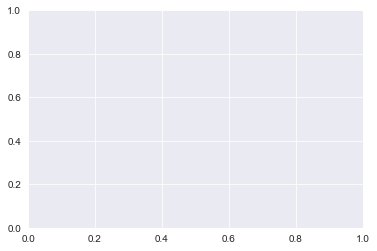

In [146]:
plt.plot(c.most_common()[:10])

In [155]:
left = range(10)
x = [l[0] for l in c.most_common(10)] 
y = [l[1] for l in c.most_common(10)] 

plt.bar(left,y, tick_label=x)
plt.show()

## 37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [170]:
neko_friends = Counter()
for r in ret:
    s = [v['base'] for v in r]
    if '猫' in s:
        neko_friends.update(s)

neko_friends['猫'] = 0
top10 = neko_friends.most_common(10)

/Users/shota.kikuchi/.pyenv/versions/3.6.8/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/shota.kikuchi/.pyenv/versions/3.6.8/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12384 missing from current font.
  font.set_text(s, 0, flags=flags)


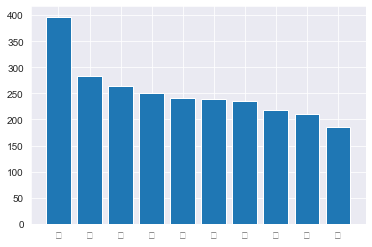

In [171]:
left = range(10)
x = [l[0] for l in top10] 
y = [l[1] for l in top10] 

plt.bar(left,y, tick_label=x)
plt.show()

## 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

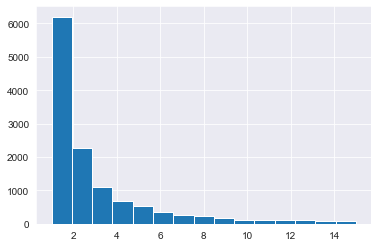

In [175]:
plt.hist(c.values(), bins=15, range=(1,15))
plt.show()

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

In [176]:
import numpy as np

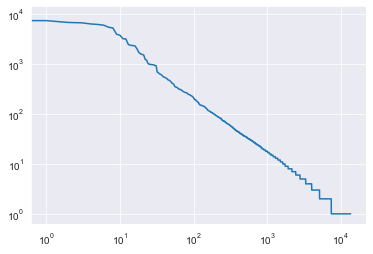

In [179]:
r = c.most_common()
x = range(len(r))
y = [y for x,y in r]
plt.xscale('log')
plt.yscale('log')
plt.plot(x, y)
plt.show()

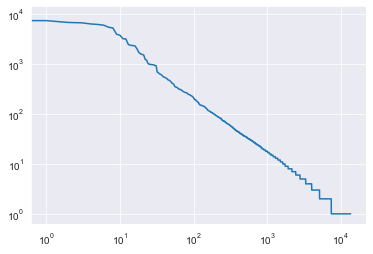

In [188]:
r = c.most_common()
x = np.arange(len(r))
y = np.array([y for x,y in r])
plt.xscale('log')
plt.yscale('log')
plt.plot(x, y)
plt.show()

In [ ]:
plt.plot()